# Overview

For the machine learning section of the Capstone, three classifiers will be compared to find which performs best. These classifiers were chosen due to their performance regarding larger datasets with many features(for this dataset: ~5k features, ~7.5k samples). The classifiers are as follows: 

    - Random Forest
    - Support Vector Machine
    - Neural Network
 
The goal of the classifiers is to predict which team will win given certain features/indicators within the game. The classifiers will be evaluated based on how many game outcomes they predicted correctly. THese results will be displayed using a confusion matrix. 

In [1]:
# Import standard packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load wrangled dataframe
league_wrangled = pd.read_csv("../Dataset/Wrangled_LeagueofLegends.csv")

In [3]:
# View dataframe
league_wrangled.head()

,bResult,gamelength,golddiff,goldblue,bKills,bInhibs,bBarons,bHeralds,goldred,rKills,...,bbot_base,rtop_outer,rtop_inner,rtop_base,rmiddle_outer,rmiddle_inner,rbmiddle_base,rbot_outer,rbot_inner,rbot_base
0,1,40,4.127967e+06,3.594454e+08,16,2,0,0,2.932450e+08,9,...,0.000,15.288,39.23,0.0,20.681,0.000,0.000,17.237,0.0,0.0
1,0,38,9.550643e+05,2.983951e+08,10,0,1,0,2.739425e+08,9,...,0.000,23.409,0.00,0.0,19.257,29.799,29.993,15.206,0.0,0.0
2,1,40,1.647345e+07,4.426966e+08,22,4,1,0,2.926390e+08,8,...,37.109,30.493,0.00,0.0,24.620,0.000,0.000,0.000,0.0,0.0
3,0,41,3.315823e+06,2.912887e+08,10,0,1,0,3.329506e+08,21,...,0.000,20.760,0.00,0.0,19.122,27.034,31.665,29.969,0.0,0.0
4,1,35,8.653433e+06,2.863538e+08,22,1,1,0,2.126620e+08,10,...,33.925,15.252,0.00,0.0,11.644,31.490,0.000,12.438,0.0,0.0


In [4]:
# Seperate labels from training data
result = league_wrangled.pop('bResult')

In [5]:
league_wrangled.head()

,gamelength,golddiff,goldblue,bKills,bInhibs,bBarons,bHeralds,goldred,rKills,rInhibs,...,bbot_base,rtop_outer,rtop_inner,rtop_base,rmiddle_outer,rmiddle_inner,rbmiddle_base,rbot_outer,rbot_inner,rbot_base
0,40,4.127967e+06,3.594454e+08,16,2,0,0,2.932450e+08,9,0,...,0.000,15.288,39.23,0.0,20.681,0.000,0.000,17.237,0.0,0.0
1,38,9.550643e+05,2.983951e+08,10,0,1,0,2.739425e+08,9,1,...,0.000,23.409,0.00,0.0,19.257,29.799,29.993,15.206,0.0,0.0
2,40,1.647345e+07,4.426966e+08,22,4,1,0,2.926390e+08,8,0,...,37.109,30.493,0.00,0.0,24.620,0.000,0.000,0.000,0.0,0.0
3,41,3.315823e+06,2.912887e+08,10,0,1,0,3.329506e+08,21,1,...,0.000,20.760,0.00,0.0,19.122,27.034,31.665,29.969,0.0,0.0
4,35,8.653433e+06,2.863538e+08,22,1,1,0,2.126620e+08,10,0,...,33.925,15.252,0.00,0.0,11.644,31.490,0.000,12.438,0.0,0.0


## Random Forest 

Random forest classifiers are made of an ensemble of decision trees. Decision trees work by seperating the data such that the homogeneity of the splits are maximized. These decision trees all return a classification, and the classification that appears most frequently is considered the final classification by the random forest. 

The random forest algorithm can easily be implemented using the Scikit-Learn Package. Because we are trying to predict between two classes (Blue team win, or Red team win), the RandomForestClassifier class will be used. 

In [6]:
# First split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(league_wrangled, result, 
                                                    test_size=0.33, random_state=42)


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5079, 5719)
Training Labels Shape: (5079,)
Testing Features Shape: (2503, 5719)
Testing Labels Shape: (2503,)


In [11]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
# Evaluate Random Forest 
rf_acc = rf.score(X_test, y_test)

print(f"Mean accuracy of random forest: {rf_acc:0.4}")

Mean accuracy of random forest: 0.9684


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1090
           1       0.98      0.97      0.97      1413

    accuracy                           0.97      2503
   macro avg       0.97      0.97      0.97      2503
weighted avg       0.97      0.97      0.97      2503



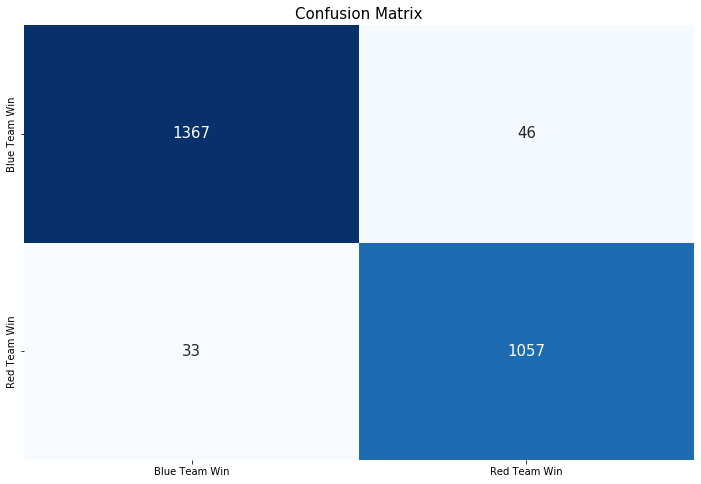

In [13]:
# Display classification report and confusino matrix
from sklearn.metrics import classification_report, confusion_matrix

predictions = rf.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, annot_kws={'size':15}, fmt='g', cbar=False, cmap="Blues",
            xticklabels=['Red Team Win', 'Blue Team Win'],  yticklabels=['Red Team Win', 'Blue Team Win'])

ax.set_title("Confusion Matrix", size=15)
plt.ylim(0, 2)
plt.yticks([0.5,1.5], ['Red Team Win', 'Blue Team Win'], va='center');
ax.invert_xaxis()

### Feature Importance

In order to see which features were the most influential in determining who would win, the variable importances will be inspected.

In [14]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(league_wrangled.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print(f'Variable: {pair[0]:20} Importance: {pair[1]}') for pair in feature_importances[:35]];

Variable: bInhibs              Importance: 0.0745
Variable: rInhibs              Importance: 0.06558
Variable: rmiddle_inner        Importance: 0.04422
Variable: bbmiddle_base        Importance: 0.04298
Variable: rbmiddle_base        Importance: 0.04043
Variable: bmiddle_inner        Importance: 0.04002
Variable: rKills               Importance: 0.0329
Variable: rBarons              Importance: 0.03133
Variable: rbot_inner           Importance: 0.02718
Variable: bKills               Importance: 0.02693
Variable: bBarons              Importance: 0.02635
Variable: rtop_inner           Importance: 0.02596
Variable: bbot_inner           Importance: 0.02577
Variable: btop_inner           Importance: 0.02484
Variable: rbot_base            Importance: 0.02364
Variable: bbot_base            Importance: 0.0204
Variable: num_of_drags         Importance: 0.01985
Variable: rtop_base            Importance: 0.01844
Variable: btop_base            Importance: 0.01509
Variable: rmiddle_outer        Imp

Based on the feature importances, it is clear that the most important features are the number of inhibtors taken by each team. Afterwards, the inner and base towers are the most significant. Based on the values, it is clear that games are not decided by a single feature alone, but rather a combination of multiple features.  

## Support Vector Machine (SVM)

A SVM is a classifier that seperates the data points using hyperplanes. Hyperplanes are calculated by maximizing the distance between support vectors and the hyperplane. SVMs take advantage of the kernel trick in order to model nonlinear features. Their advantages include: 

- Performs well for high-dimensional data
- Useful when classes are seperable 
- Suited for binary classification

All of these advantages are applicable to the wrangled league of legends dataset. With regards to the SVM's disadvantages, these include: 

- Requires a large amount of processing time for large datasets
- Does not perform well on overlapping classes
- Can be difficult selecting the proper kernel function 

In [7]:
# Import StandardScaler  
from sklearn.preprocessing import StandardScaler

league_ss = league_wrangled.copy()
ss = StandardScaler() 
league_ss = ss.fit_transform(league_ss)

In [8]:
# Split data into training and testing sets
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(league_ss, result, 
                                                    test_size=0.33, random_state=42)

In [13]:
# Import SVM
from sklearn.svm import SVC

svc = SVC(gamma="scale") 
svc.fit(X_train_ss, y_train_ss)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
svc_acc = svc.score(X_test_ss, y_test_ss)

print(f"Mean Accuracy of SVC: {svc_acc}")

Mean Accuracy of SVC: 0.9372752696763883


## Neural Network 

Neural networks are modeled after the way neurons are structured. They are able to learn complex relationships and functions through the adjustment of weights by gradient descent. Simply put, they learn by reducing the error between the predicted value/class and the actual value/class.

Because of the nature of neural networks, a simple neural network will be constructed using a single hidden layer. The layer will have half the number of features, will a final single output neuron. 

In [9]:
# Transform inputs 
X_train_array = np.asarray(X_train_ss)
y_train_array = np.asarray(y_train_ss)

X_test_array = np.asarray(X_test_ss)
y_test_array = np.asarray(y_test_ss)

In [10]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

input_size = len(X_train_array[0])
inputs = keras.Input(shape=(input_size, )) 
dense = layers.Dense(.5*input_size, activation='relu')(inputs)
output = layers.Dense(1, activation='softmax')(dense)

model = keras.Model(inputs=inputs, outputs=output, name='base_league_model')

In [66]:
model.summary()

Model: "base_league_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5719)]            0         
_________________________________________________________________
dense_302 (Dense)            (None, 2859)              16353480  
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 2860      
Total params: 16,356,340
Trainable params: 16,356,340
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_array, y_train_array, 
          batch_size=32, 
          epochs=100)

Train on 5079 samples
Epoch 1/100
5079/5079 [==============================] - 5s 1ms/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 2/100
5079/5079 [==============================] - 4s 867us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 3/100
5079/5079 [==============================] - 4s 865us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 4/100
5079/5079 [==============================] - 4s 867us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 5/100
5079/5079 [==============================] - 4s 873us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 6/100
5079/5079 [==============================] - 4s 871us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 7/100
5079/5079 [==============================] - 4s 872us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 8/100
5079/5079 [==============================] - 4s 871us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 9/100
5079/5079 [==============================] - 4s 873us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 10/100
5079

In [68]:
test_scores = model.evaluate(X_test_array, y_test_array, verbose=2)

print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

2503/1 - 3s - loss: 6.6243 - accuracy: 0.5645
Test loss: 6.677279455205511
Test accuracy: 0.56452256


Clearly the neural network did not perform as well as the other two models with an accuracy of 56%. This is likely because a single hidden layer is not enough to properly capture the underlying function governing the result of the games. 

## Improving the Models

Despite the random forest and svm classifiers' already high performance, gridsearchCV will be used in an attempt to improve their accuracies. GridsearchCV will also be applied to the neural networks. 

### Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV

rf_parameters = {
    'n_estimators':[100,200,500,1000],
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2', None]
}

svc_parameters = {
    'C':[0.001, 0.01, 0.1, 1, 10],
    'gamma': ['auto', 'scale']
} 

nn_parameters = {
    'dropout_rate': [0.5, 0.2],
    'neurons': [1000, 250],
    'batch_size': [32, 8],
    'epochs': [10, 100]
}

In [22]:
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, rf_parameters, cv=3, n_jobs=2)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [23]:
print("Best Random Forest parameters")
print(rf_clf.best_params_)

Best Random Forest parameters
{'criterion': 'entropy', 'max_features': None, 'n_estimators': 1000}


In [24]:
rf_clf_acc = rf_clf.score(X_test, y_test)

print(f"Mean accuracy of random forest: {rf_clf_acc:0.4}")

Mean accuracy of random forest: 0.9808


In [25]:
svc = SVC() 
svc_clf = GridSearchCV(svc, svc_parameters, cv=3, n_jobs=2)
svc_clf.fit(X_train_ss, y_train_ss)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print("Best SVC parameters")
print(svc_clf.best_params_)

Best SVC parameters
{'C': 10, 'gamma': 'auto'}


In [27]:
svc_clf_acc = svc_clf.score(X_test_ss, y_test_ss)

print(f"Mean Accuracy of SVC: {svc_clf_acc}")

Mean Accuracy of SVC: 0.9368757491010787


### Improving the Neural Network

In [16]:
from tensorflow.keras.models import Sequential

def create_model(optimizer='adam', dropout_rate=0.0, neurons=1):
    
    input_size = len(X_train_array[0])

    model = Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_dim=input_size))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(neurons, activation='relu', input_dim=input_size))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(neurons, activation='relu', input_dim=input_size))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(0.5*neurons, activation='relu', input_dim=input_size))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(0.25*neurons, activation='relu', input_dim=input_size))
    model.add(layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(1, activation='softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# train on a sample of training data
X_train_cv = X_train_array[0:250]
y_train_cv = y_train_array[0:250]

grid = GridSearchCV(estimator=model, param_grid=nn_parameters, cv=3, n_jobs=1)
grid_result = grid.fit(X_train_cv, y_train_cv)

print("Best Model:")
print(f"acc: {grid_result.best_score_} using params: {grid_result.best_params_}")

Best Model:
acc: 0.524000013589859 using params: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 10, 'neurons': 1000}


In [46]:
rf_features = [pair[0] for pair in feature_importances[:20]]

rf_league_wrangled = league_wrangled[rf_features].copy()
rf_ss = StandardScaler() 
rf_league_ss = rf_ss.fit_transform(rf_league_wrangled)

X_train_rf_ss, X_test_rf_ss, y_train_rf_ss, y_test_rf_ss = train_test_split(rf_league_ss, result, 
                                                                            test_size=0.33, random_state=42)

In [47]:
X_train_rf_array = np.asarray(X_train_rf_ss)
y_train_rf_array = np.asarray(y_train_rf_ss)

X_test_rf_array = np.asarray(X_test_rf_ss)
y_test_rf_array = np.asarray(y_test_rf_ss)

In [51]:
input_size = len(X_train_rf_array[0])
inputs_rf = keras.Input(shape=(input_size, )) 
dense_rf = layers.Dense(1.5*input_size, activation='relu')(inputs_rf)
output_rf = layers.Dense(1, activation='sigmoid')(dense_rf)

model_rf = keras.Model(inputs=inputs_rf, outputs=output_rf, name='base_league_model')

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(X_train_array, y_train_array, 
          callbacks=[keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)],
          batch_size=32, 
          epochs=100)

Train on 5079 samples
Epoch 1/100
5079/5079 [==============================] - 1s 252us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 2/100
5079/5079 [==============================] - 1s 180us/sample - loss: 7.1398 - accuracy: 0.5344
Epoch 3/100
5079/5079 [==============================] - 1s 182us/sample - loss: 7.1398 - accuracy: 0.5344
